Pipeline image registration

Steps:
- calculate template frame
- apply ants registration
- calculate metrics
- apply blob detection
- generate video from registered images with detected blobs


In [1]:
import corr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from skimage.feature import blob_log

In [5]:
frames = corr.load_example_experiment()
#denoised_frames = corr.denoise_stack(frames)
template_idx = corr.find_highest_correlation(frames)
template = frames[template_idx]

corrected = corr.ants_reg(frames, template_idx)
corrected = corr.denoise_stack(corrected)
blobs_log = []
for frame in corrected:
    blobs_log.append(blob_log(frame, min_sigma=5, max_sigma=15, num_sigma=5,threshold=0.04))
ssims = corr.evaluate(corrected, template)
print(np.mean(ssims))

100%|██████████| 544/544 [13:40<00:00,  1.51s/it]


0.4158064840018852


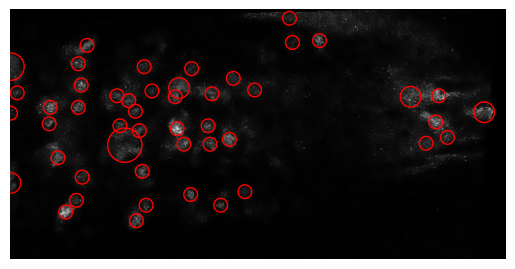

In [6]:

fig, ax = plt.subplots()
writer = animation.FFMpegWriter(fps=10)

with writer.saving(fig, "blobs_overlay_matplotlib.mp4", dpi=100):
    for frame, blobs in zip(corrected, blobs_log, strict=False):
        ax.clear()
        ax.imshow(frame, cmap="gray")
        for y, x, sigma in blobs:
            circle = plt.Circle((x, y), sigma*np.sqrt(2), edgecolor="r", fill=False, lw=1)
            ax.add_patch(circle)
        ax.axis("off")
        writer.grab_frame()
